## Malaria Parasite Detection Using CNN

Watch Full Video Here: https://youtu.be/Jdagdil0FIw


![alt text](https://ourworldindata.org/uploads/2019/04/Previous-prevalence-of-malaria-world-map.png)

Malaria is an infectious disease that causes over 400,000 deaths per year.

Mosquitoes are notorious for carrying malaria

In 2018, Rajaraman et al. published a paper entitled Pre-trained convolutional neural networks as feature extractors toward improved parasite detection in thin blood smear images.

Link: https://lhncbc.nlm.nih.gov/publication/pub9932

Paper Link: https://lhncbc.nlm.nih.gov/system/files/pub9752.pdf

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2018/12/dl_medical_imaging_malaria_dataset.jpg)

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 72kB/s 
     |████████████████████████████████| 4.3MB 38.2MB/s 
     |████████████████████████████████| 501kB 56.3MB/s 


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.13.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/daffeyd/MalariaDetection.git

Cloning into 'MalariaDetection'...
remote: Enumerating objects: 27569, done.
remote: Total 27569 (delta 0), reused 0 (delta 0), pack-reused 27569
Receiving objects: 100% (27569/27569), 317.69 MiB | 30.76 MiB/s, done.
Updating files: 100% (27562/27562), done.


In [4]:
img_width = 64
img_height = 64

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [7]:
train_data_generator = datagen.flow_from_directory(directory='/content/MalariaDetection/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [8]:
validation_data_generator = datagen.flow_from_directory(directory='/content/MalariaDetection/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [9]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## CNN Model Building

In [10]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 15,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/15
   4/1378 [..............................] - ETA: 25s - loss: 0.1699 - accuracy: 0.9688

<ipython-input-17-e2ef54906d16>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


1378/1378 [==============================] - 36s 26ms/step - loss: 0.1448 - accuracy: 0.9549 - val_loss: 0.1804 - val_accuracy: 0.9450
Epoch 2/15
1378/1378 [==============================] - 36s 26ms/step - loss: 0.1354 - accuracy: 0.9577 - val_loss: 0.2613 - val_accuracy: 0.9303
Epoch 3/15
1378/1378 [==============================] - 36s 26ms/step - loss: 0.1296 - accuracy: 0.9582 - val_loss: 0.1808 - val_accuracy: 0.9430
Epoch 4/15
1378/1378 [==============================] - 34s 25ms/step - loss: 0.1245 - accuracy: 0.9604 - val_loss: 0.1964 - val_accuracy: 0.9426
Epoch 5/15
1378/1378 [==============================] - 35s 26ms/step - loss: 0.1247 - accuracy: 0.9600 - val_loss: 0.2137 - val_accuracy: 0.9401
Epoch 6/15
1378/1378 [==============================] - 35s 25ms/step - loss: 0.1175 - accuracy: 0.9634 - val_loss: 0.2123 - val_accuracy: 0.9316
Epoch 7/15
1377/1378 [============================>.] - ETA: 0s - loss: 0.1138 - accuracy: 0.9625

In [14]:
history.history

{'loss': [0.5622934699058533,
  0.23783183097839355,
  0.19966334104537964,
  0.17145639657974243,
  0.15103726089000702],
 'accuracy': [0.700154185295105,
  0.9202648997306824,
  0.9349147081375122,
  0.9440765380859375,
  0.9539186954498291],
 'val_loss': [0.2182253897190094,
  0.18884387612342834,
  0.16847103834152222,
  0.16191326081752777,
  0.17857331037521362],
 'val_accuracy': [0.9294010996818542,
  0.9294010996818542,
  0.9343012571334839,
  0.9364791512489319,
  0.9402903914451599]}

In [15]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

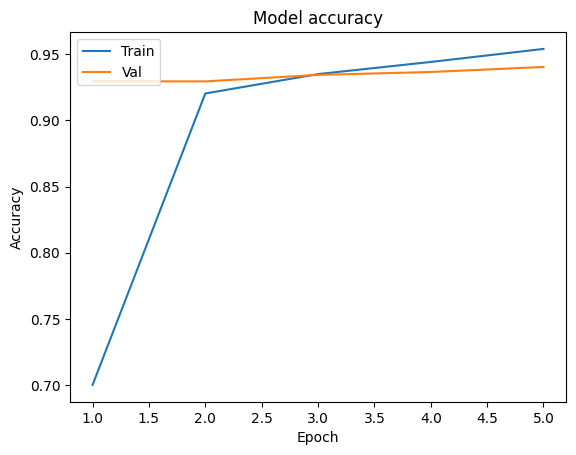

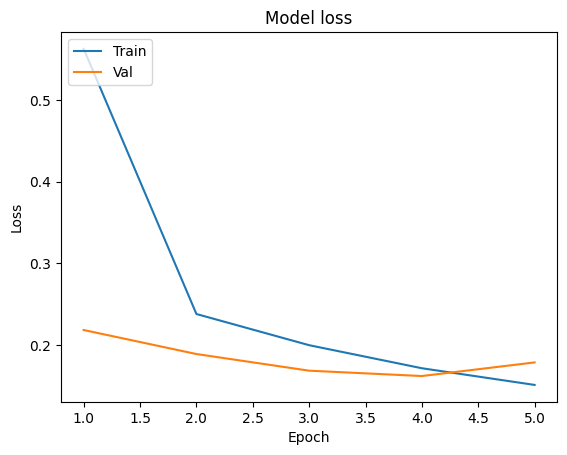

In [16]:
plot_learningCurve(history, 5)